<a href="https://colab.research.google.com/github/DeepBhattarai/Machine_Learning/blob/main/Taxi_trip_ML_function_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn

In [145]:
#imports necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [146]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [147]:

url = 'https://raw.githubusercontent.com/DeepBhattarai/Machine_Learning/refs/heads/main/taxi_trip_pricing.csv' #url location of the file

df1 = pd.read_csv(url) #read the csv file and converts it to pandas dataframe (df)

df1.head() #provides the first five rows of the dataframe

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Data Preprocessing and cleaning

In [148]:
df1.shape #gives the rows and column of df

(1000, 11)

In [149]:
df1.info() #provides the summary info of the datframe,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [150]:
duplicate_data = df1[df1.duplicated()]
print(duplicate_data.any()) #provides if there is any duplicates in the df

Trip_Distance_km         False
Time_of_Day              False
Day_of_Week              False
Passenger_Count          False
Traffic_Conditions       False
Weather                  False
Base_Fare                False
Per_Km_Rate              False
Per_Minute_Rate          False
Trip_Duration_Minutes    False
Trip_Price               False
dtype: bool


In [151]:
df1.isnull().sum() #provides if there is any null values in the dataframe

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [152]:
df2 = df1.dropna()
df2.isnull().sum()
df2.count()          #drops the null values(rows) from the dataframe

,0
Trip_Distance_km,562
Time_of_Day,562
Day_of_Week,562
Passenger_Count,562
Traffic_Conditions,562
Weather,562
Base_Fare,562
Per_Km_Rate,562
Per_Minute_Rate,562
Trip_Duration_Minutes,562


In [153]:
df1.describe() #provides the summary statistics for the df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [154]:
#fills the missing values in the column with float64 datatypes

df1['Trip_Distance_km'] = df1['Trip_Distance_km'].fillna(df1['Trip_Distance_km'].mean())
df1['Passenger_Count']= df1['Passenger_Count'].fillna(round(df1['Passenger_Count'].mean()))
df1['Base_Fare'] = df1['Base_Fare'].fillna(df1['Base_Fare'].mean())
df1['Per_Km_Rate'] = df1['Per_Km_Rate'].fillna(df1['Per_Km_Rate'].mean())
df1['Per_Minute_Rate'] = df1['Per_Minute_Rate'].fillna(df1['Per_Minute_Rate'].mean())
df1['Trip_Duration_Minutes'] = df1['Trip_Duration_Minutes'].fillna(df1['Trip_Duration_Minutes'].mean())
df1['Trip_Price'] = df1['Trip_Price'].fillna(df1['Trip_Price'].mean())

In [155]:
df1.isnull().sum() #provides info on the null objects

,0
Trip_Distance_km,0
Time_of_Day,50
Day_of_Week,50
Passenger_Count,0
Traffic_Conditions,50
Weather,50
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [156]:
df1.dropna(inplace=True) #this ensures the df is updated after above alterations

In [157]:
df1.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [158]:
df1.count() #counts the entries(rows) of the dataframe

,0
Trip_Distance_km,811
Time_of_Day,811
Day_of_Week,811
Passenger_Count,811
Traffic_Conditions,811
Weather,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


## **Exploratory data analysis**

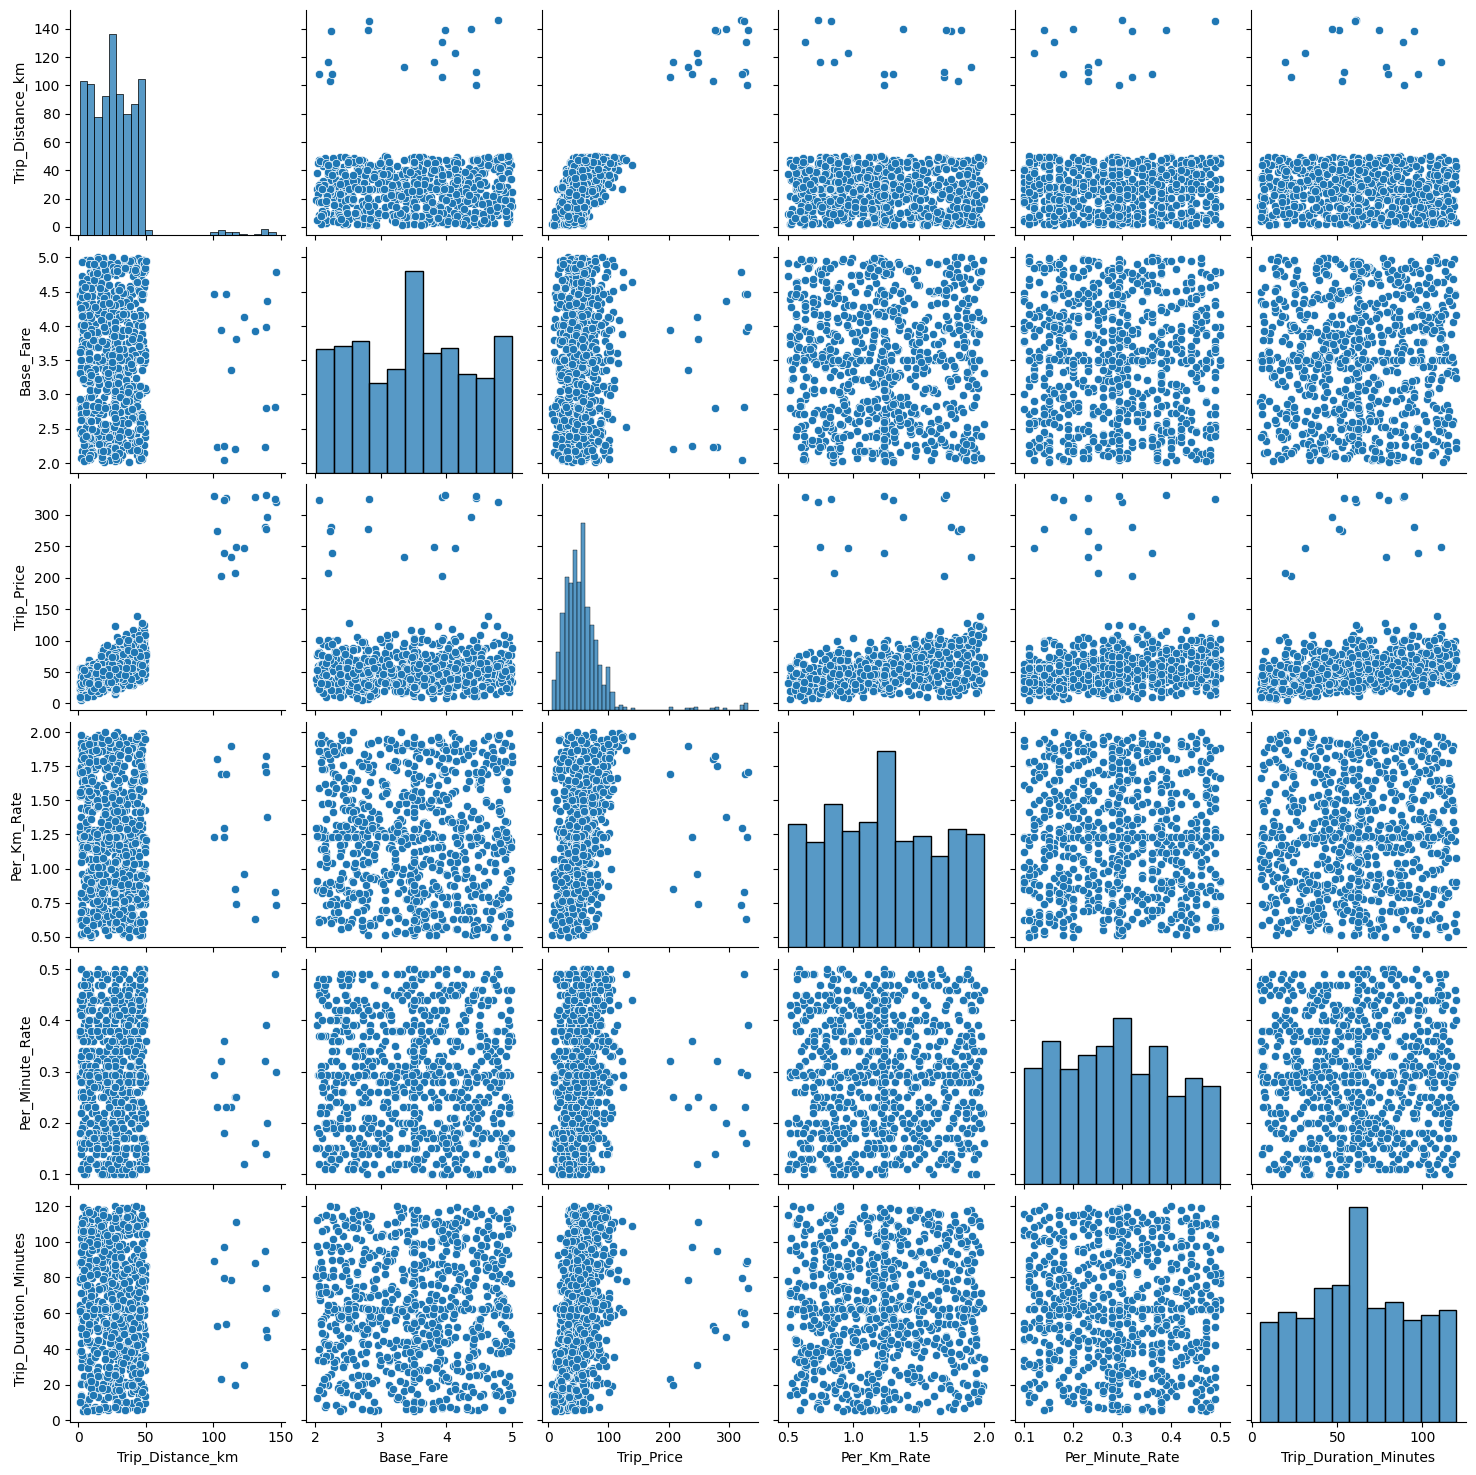

In [161]:
#provides the graphical distribution and correlation of the datas
sns.pairplot(df1[['Trip_Distance_km','Base_Fare','Trip_Price','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']])

In [162]:
#provides correlation matrix
df1[['Trip_Price','Base_Fare','Trip_Distance_km','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']].corr()

,Trip_Price,Base_Fare,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
Trip_Price,1.000000,0.026285,0.833846,0.248681,0.109352,0.219064
Base_Fare,0.026285,1.000000,0.018987,0.017023,-0.030323,0.034684
Trip_Distance_km,0.833846,0.018987,1.000000,-0.031719,-0.046357,-0.014432
Per_Km_Rate,0.248681,0.017023,-0.031719,1.000000,0.020760,0.043719
Per_Minute_Rate,0.109352,-0.030323,-0.046357,0.020760,1.000000,-0.007651
Trip_Duration_Minutes,0.219064,0.034684,-0.014432,0.043719,-0.007651,1.000000


In [163]:
'''After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation
between Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and
Per_Km_Rate,Trip_Duration_Minutes respectively.'''

'After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation\nbetween Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and\nPer_Km_Rate,Trip_Duration_Minutes respectively.'

<Axes: >

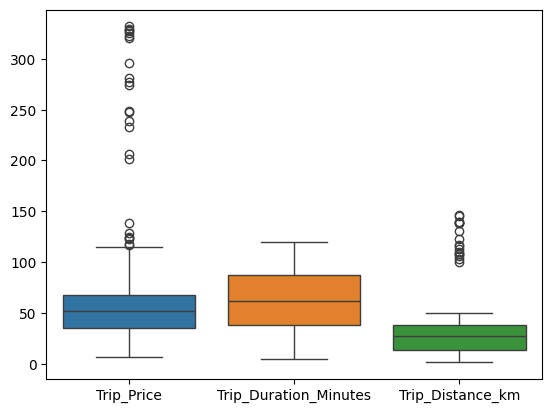

In [164]:
#helps to visualize and identify outlies
sns.boxplot(data= df1[['Trip_Price','Trip_Duration_Minutes','Trip_Distance_km']])

In [159]:
 sk =df1['Trip_Price'].skew() #measures the skewness of the data
print(sk) #(if skew==0;symmetric, if skew<0;negative skew, if skew>0;positive skew)

3.9184181987826125


In [160]:
df1['Trip_Distance_km'].skew()

2.3631579670484952

<Axes: >

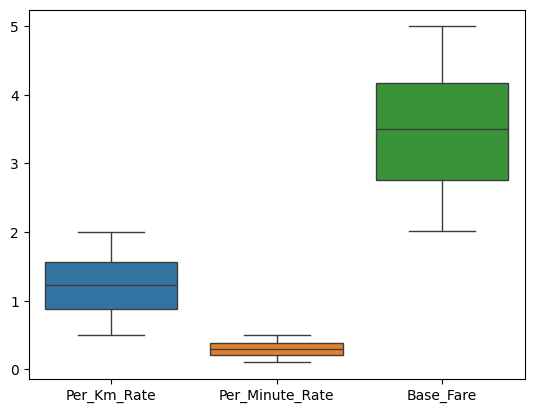

In [165]:
sns.boxplot(data = df1[['Per_Km_Rate','Per_Minute_Rate','Base_Fare']])

<Axes: >

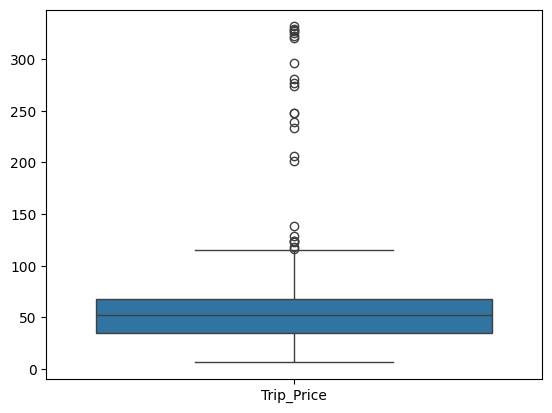

In [166]:
sns.boxplot(df1[['Trip_Price']])

In [167]:
#function for applying log transformation
def log_transform(x):
    for i in range(df1.shape[0]):
        new_value = np.log(x)
    return new_value

In [168]:
df1['Log_Trip_Price'] = df1['Trip_Price'].apply(log_transform)

In [169]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719


<Axes: xlabel='Trip_Price', ylabel='Count'>

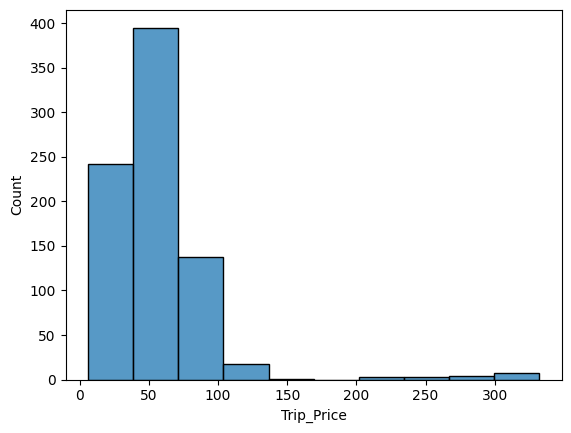

In [170]:
#helps to see data distribution
sns.histplot(df1['Trip_Price'],bins=10)

<Axes: >

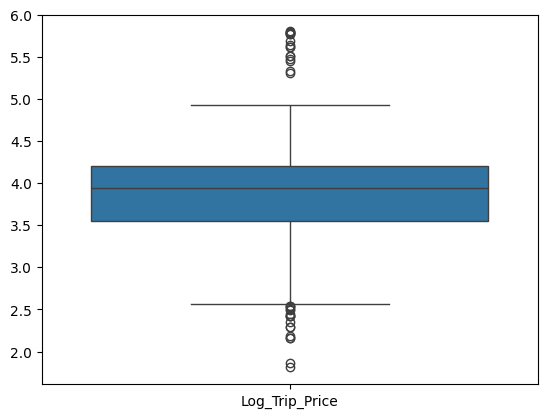

In [171]:
sns.boxplot(df1[['Log_Trip_Price']])

<Axes: xlabel='Log_Trip_Price', ylabel='Count'>

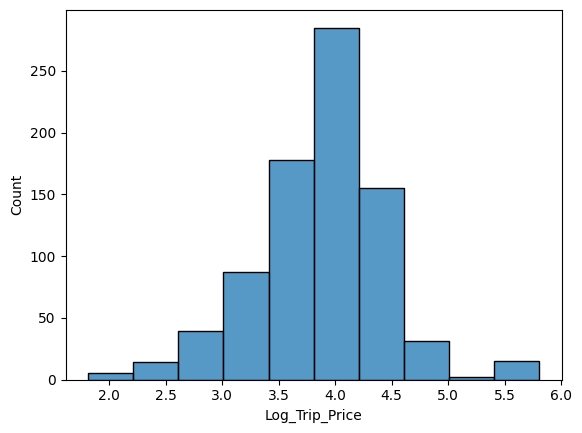

In [172]:
sns.histplot(df1['Log_Trip_Price'],bins=10)

In [173]:
#another way of applying log transformation
df1['log_Trip_Distance_km'] = df1['Trip_Distance_km'].apply(lambda x: np.log(x))

In [174]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price,log_Trip_Distance_km
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781,2.962692
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852,3.862623
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464,3.607398
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424,3.298446
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719,2.156403


Text(0, 0.5, 'Count')

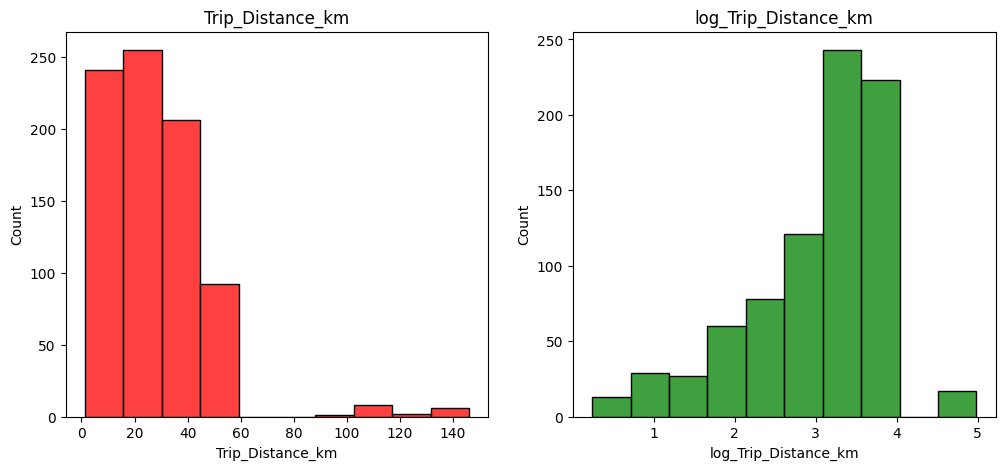

In [175]:
# creating subplots for simultaneous comparison
fig,axes = plt.subplots(1,2,figsize = (12,5))

sns.histplot(df1['Trip_Distance_km'], bins = 10, kde = False, color = 'Red', ax = axes[0])
axes[0].set_title('Trip_Distance_km')
axes[0].set_xlabel('Trip_Distance_km')
axes[0].set_ylabel('Count')

sns.histplot(df1['log_Trip_Distance_km'], bins = 10, kde = False, color = 'green', ax = axes[1])
axes[1].set_title('log_Trip_Distance_km')
axes[1].set_xlabel('log_Trip_Distance_km')
axes[1].set_ylabel('Count')



## SGDR algorithm

In [176]:
# extracting only the features applicable to linear regressor from df1 and creating new df2
df2 = df1[['Trip_Price','Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]

In [177]:
df2.head(5)

,Trip_Price,Trip_Distance_km,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,36.262400,19.350000,3.560000,0.80,0.32,53.82
1,56.874773,47.590000,3.502989,0.62,0.43,40.57
2,52.903200,36.870000,2.700000,1.21,0.15,37.27
4,15.618000,27.070547,2.930000,0.63,0.32,22.64
5,60.202800,8.640000,2.550000,1.71,0.48,89.33


In [178]:
df2.count()

,0
Trip_Price,811
Trip_Distance_km,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


In [179]:
X = df2[['Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]
y = df2['Trip_Price']

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

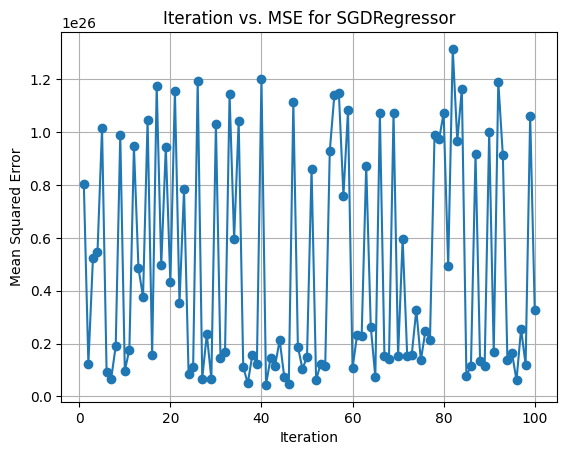

In [181]:
sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)

iteration = 100
mse_value = []

for i in range(iteration):
  sgd_regressor = sgd_regressor.fit(X_train,y_train)
  y_pred = sgd_regressor.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  mse_value.append(mse)

plt.plot(range(1, iteration + 1), mse_value, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Iteration vs. MSE for SGDRegressor')
plt.grid()
plt.show()

In [196]:
'''def main():
  sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)
  '''

def regressor_sgd(X1,X2,y1,y2,iter,l):

  iteration = iter
  mse_value = []
  y_pred_list = []
  for j in range(len(l)):
    sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True,alpha=0.1,eta0=l[j],random_state=42)
    mse_value_l =[]
    for i in range(iteration):
        sgd_regressor = sgd_regressor.fit(X1,y1)
        y_pred = sgd_regressor.predict(X2)
        mse = mean_squared_error(y2,y_pred)
        mse_value_l.append(mse)
        y_pred_list.append(y_pred)
    mse_value.append(mse_value_l)

  #print(min(mse_value))
  plt.figure(figsize=(10,6))
  for i in range(len(l)):
    plt.plot(range(1,iteration+1),mse_value[i],marker = 'o',label=f'learning_rate={l[i]}')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('Iteration vs. MSE for SGDRegressor')
  plt.legend()
  plt.grid()
  plt.show()

  return y_pred
#regressor_sgd(X_train,X_test,y_train,y_test,10)

if __name__ == '__regressor_sgd__':
  regressor_sgd(X1,X2,y1,y2,iter)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

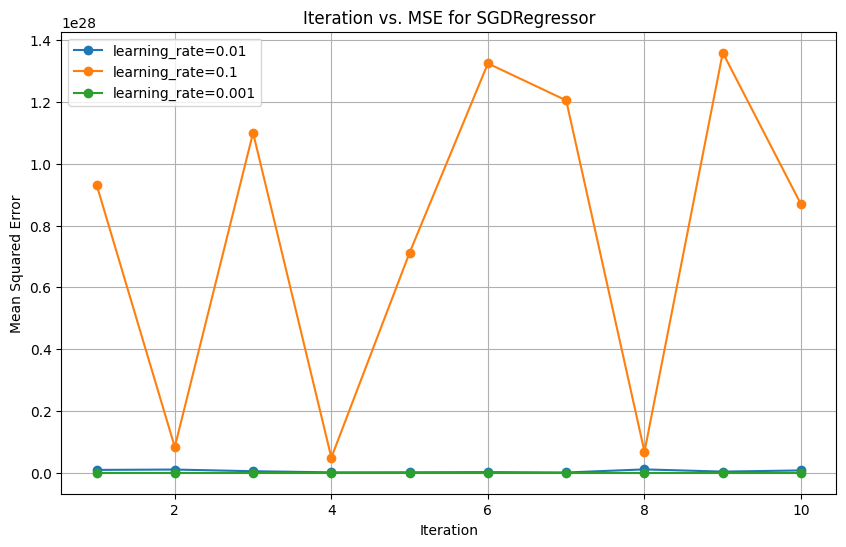

In [197]:
l = [0.01,0.1,0.001]
sgd_regressor_norm = regressor_sgd(X_train,X_test,y_train,y_test,10,l)

In [184]:

print(mse)

3.2762800249081015e+25


In [216]:
'''def main():
  sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)
  '''

def regressor_sgd(X1,X2,y1,y2,iter,l):

  iteration = iter
  mse_value = []
  y_pred_list = []
  for j in range(len(l)):
    sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True,alpha=0.1,eta0=l[j],random_state=42)
    mse_value_l =[]
    for i in range(iteration):
        sgd_regressor = sgd_regressor.fit(X1,y1)
        y_pred = sgd_regressor.predict(X2)
        mse = mean_squared_error(y2,y_pred)
        mse_value_l.append(mse)
        y_pred_list.append(y_pred)
    mse_value.append(mse_value_l)

  #print(min(mse_value))
  plt.figure(figsize=(10,6))
  for i in range(len(l)):
    plt.plot(range(1,iteration+1),mse_value[i],marker = 'o',label=f'learning_rate={l[i]}')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('Iteration vs. MSE for SGDRegressor')
  plt.legend()
  plt.grid()
  plt.show()

  return y_pred
#regressor_sgd(X_train,X_test,y_train,y_test,10)

if __name__ == '__regressor_sgd__':
  regressor_sgd(X1,X2,y1,y2,iter,l)

In [202]:

print(mse)

3.2762800249081015e+25


In [203]:
b = sgd_regressor.intercept_
w = sgd_regressor.coef_
print(b)
print(w)

[1.3929209e+11]
[-6.04490037e+10 -2.87197275e+11  8.38148420e+10  6.12778819e+10
  1.05158541e+11]


In [221]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

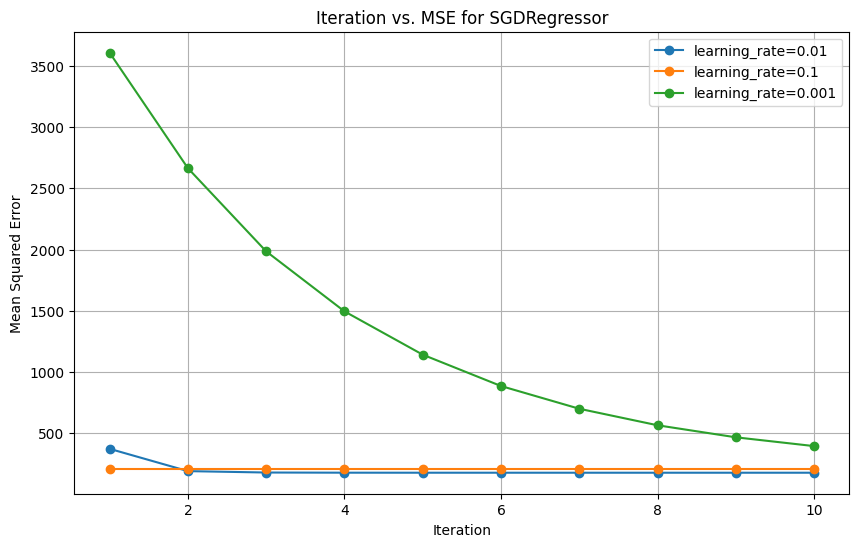

In [217]:
l = [0.01,0.1,0.001]
sgd_regressor_norm = regressor_sgd(X_train_norm,X_test_norm,y_train,y_test,10,l)

In [190]:
b_norm = sgd_regressor.intercept_
w_norm = sgd_regressor.coef_
print(b_norm)
print(w_norm)

[1.3929209e+11]
[-6.04490037e+10 -2.87197275e+11  8.38148420e+10  6.12778819e+10
  1.05158541e+11]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

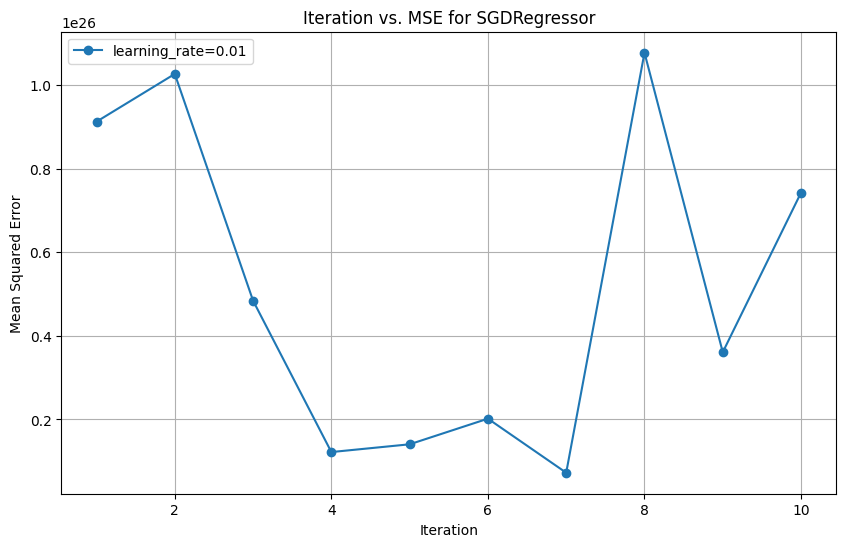

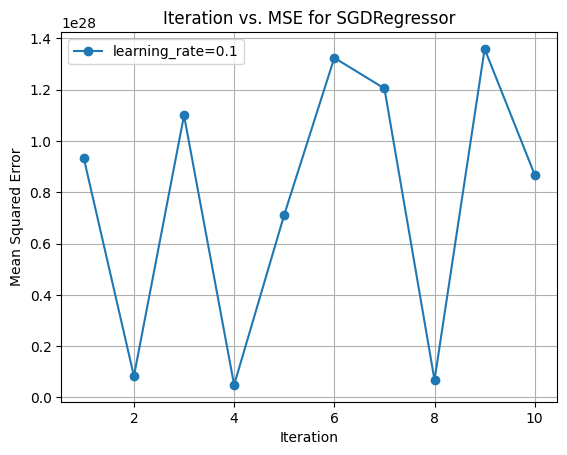

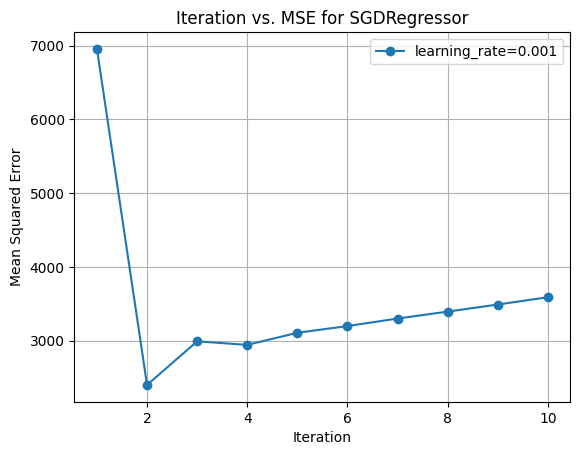

-1.3543045700885967
-1.3543045700885963


In [192]:
from sklearn.metrics import r2_score
new_pred = (regressor_sgd(X_train,X_test,y_train,y_test,10,l))
reshaped_new_pred = new_pred.reshape(-1,1)
reshaped_y_test = y_test.to_numpy().reshape(-1,1)
scaler = StandardScaler()
y_pred_norm = scaler.fit_transform(reshaped_new_pred)
y_test_norm = scaler.transform(reshaped_y_test)
r2_score_norm = r2_score(y_test_norm,y_pred_norm)
print(r2_score_norm)

r2_score_raw = r2_score(y_test,new_pred)
print(r2_score_raw)

#polynomial fit

In [ ]:
def poly_regressor(X1,X2,y1,y2,iter,l):

  mse_value=[]

  for j in range(len(l)):
    poly_sgd_model = SGDRegressor(max_iter=1,tol=1e-3,warm_start=True,penalty='l2',alpha =0.1,eta0=l[j],random_state=42)
    mse_value_l= []
    for i in range(iter):
      poly_sgd_model = poly_sgd_model.fit(X1,y1)
      y_pred = poly_sgd_model.predict(X2)
      Mse = mean_squared_error(y2,y_pred)
      mse_value_l.append(Mse)
    mse_value.append(mse_value_l)
    print(mse_value)
  plt.figure(figsize=(10,6))
  for i in range(len(mse_value)):
    plt.plot(range(1, iter + 1), mse_value[i], marker='o',label=f'Learning_rate={l[i]}')

    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Iteration vs. MSE for SGDRegressor')
    plt.legend()
    plt.grid()

if __name__ == '__poly_regressor__':
  poly_regressor(X1,X2,y1,y2,iter)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 4)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)
l = [0.01,0.1,0.001]
poly_regressor(x_train_poly,x_test_poly,y_train,y_test,10,l)



#Principal Component Analysis (PCA)

[0.22383044 0.21252694]


<ipython-input-238-83ba62cdc3e0>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


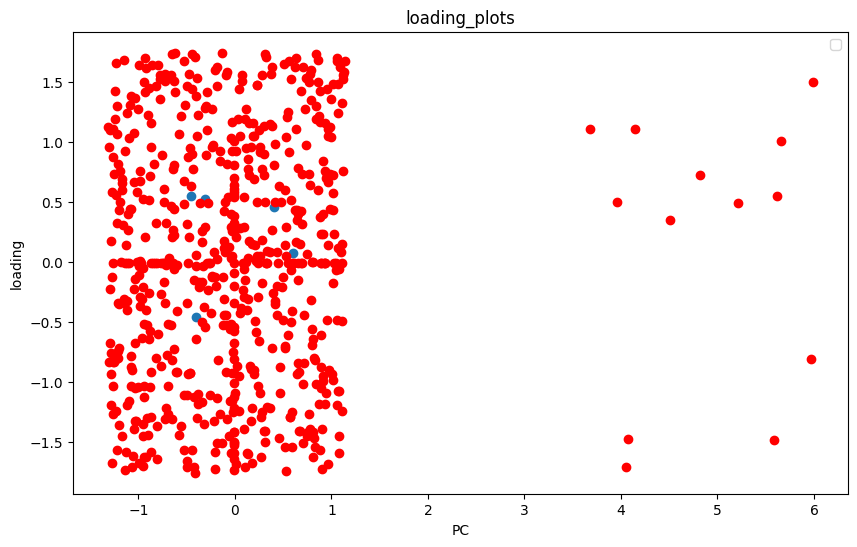

In [238]:
from sklearn.decomposition import PCA
principal = PCA(n_components=2)
principal.fit(X_train_norm)
x_test_pca = principal.transform(X_test_norm)
x_test_pca = principal.transform(X_test_norm)
principal.fit(X_train_norm)
print(principal.explained_variance_ratio_)

plt.figure(figsize=(10,6))
#for i in range(len(X_train_norm)):
plt.scatter(principal.components_[0],principal.components_[1])
for i in range(len(X_train_norm)):
  plt.scatter(X_train_norm[i][0],X_train_norm[i][1],color='red')
plt.title('loading_plots')
plt.xlabel('PC')
plt.ylabel('loading')
plt.legend()
plt.show()

# Random Section


In [ ]:
!wget https://raw.githubusercontent.com/fanatic8/Machine_Learning/main/Taxi_database.ipynb


In [ ]:
%run Taxi_database.ipynb

In [ ]:
print(pandas_to_database())